# Vietnam's Property Price Analysis and Prediction

## Introduction
This project aims to implement EDA(Exploring Data Analysis) and apply traditional Machine Learning to make a prediction in property's Price of Vietnamese house. In this project, I used common EDA technique, preprocessing data and comparision of **Linear Regression, DecisionTree, RandomForest, XGBoost Regression, MLPRegression, KNeighborsRegression**. To estimate the models, I leverage common metrics such as **R^2, RMSE, MAE**.

## About this dataset
The dataset is crawled in batdongsan.vn, it consists of attributes of each property, such as its location, physical characteristics, and legal and furnishing status, along with the price.

Column Descriptions:
- **Address**: The complete address of the property, including details such as the project name, street, ward, district, and city.
- **Area**: The total area of the property, measured in square meters.
- **Frontage**: The width of the front side of the property, measured in meters.
- **Access Road**: The width of the road providing access to the property, measured in meters.
- **House Direction**: The cardinal direction the front of the house is facing (e.g., East, West, North, South).
- **Balcony Direction**: The cardinal direction the balcony is facing.
- **Floors**: The total number of floors in the property.
- **Bedrooms**: The number of bedrooms in the property.
- **Bathrooms**: The number of bathrooms in the property.
- **Legal Status**: Indicates the legal status of the property, such as whether it has a certificate of ownership or is under a sale contract.
- **Furniture State**: Indicates the state of furnishing in the property, such as fully furnished, partially furnished, or unfurnished.
- **Price**: The price of the property, represented in billions of Vietnamese Dong (VND).

## Import dependencies 

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
import lightgbm

import warnings
warnings.filterwarnings('ignore')

## Pre-processing Data

In [269]:
df = pd.read_csv("vietnam_housing_dataset.csv")
legal_price_df = df[["Price", "Legal status"]]
df

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90
...,...,...,...,...,...,...,...,...,...,...,...,...
30224,"Đường Lê Quang Định, Phường 1, Gò Vấp, Hồ Chí ...",67.0,4.1,16.0,NaN,NaN,1.0,3.0,2.0,Have certificate,NaN,4.60
30225,"Đường Ngô Gia Tự, Phường Đức Giang, Long Biên,...",30.0,NaN,NaN,NaN,NaN,5.0,3.0,3.0,Have certificate,NaN,4.70
30226,"Đường Gò Dưa, Phường Tam Bình, Thủ Đức, Hồ Chí...",69.4,4.0,15.0,Đông - Bắc,Đông - Bắc,NaN,NaN,NaN,Have certificate,Basic,7.50
30227,"Đường Quang Trung, Phường 11, Gò Vấp, Hồ Chí Minh",96.0,NaN,8.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,9.50


### Obverse Null value in Dataset

As I observed, there are many Null values in dataset, some categorical data and numerics, which will affect the prediction, some of columns has a half records are Null.                                   

In [270]:
for column in df.columns:
    print(f"Number of NaN in {column}: {len(df[df[column].isnull()])}")

Number of NaN in Address: 0
Number of NaN in Area: 0
Number of NaN in Frontage: 11564
Number of NaN in Access Road: 13297
Number of NaN in House direction: 21239
Number of NaN in Balcony direction: 24983
Number of NaN in Floors: 3603
Number of NaN in Bedrooms: 5162
Number of NaN in Bathrooms: 7074
Number of NaN in Legal status: 4506
Number of NaN in Furniture state: 14119
Number of NaN in Price: 0


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            30229 non-null  object 
 1   Area               30229 non-null  float64
 2   Frontage           18665 non-null  float64
 3   Access Road        16932 non-null  float64
 4   House direction    8990 non-null   object 
 5   Balcony direction  5246 non-null   object 
 6   Floors             26626 non-null  float64
 7   Bedrooms           25067 non-null  float64
 8   Bathrooms          23155 non-null  float64
 9   Legal status       25723 non-null  object 
 10  Furniture state    16110 non-null  object 
 11  Price              30229 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.8+ MB


### Dealing with Null Value
For the numerical value, I will replace it with median values, like Floors, Bedrooms, Bathrooms values, these columns has no clue to fill, so I replace it with its median is a good idea.

In [272]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

In [273]:
df

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,4.5,6.0,NaN,NaN,4.0,3.0,3.0,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,4.5,6.0,NaN,NaN,5.0,3.0,3.0,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,3.0,3.0,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,4.5,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,4.5,6.0,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90
...,...,...,...,...,...,...,...,...,...,...,...,...
30224,"Đường Lê Quang Định, Phường 1, Gò Vấp, Hồ Chí ...",67.0,4.1,16.0,NaN,NaN,1.0,3.0,2.0,Have certificate,NaN,4.60
30225,"Đường Ngô Gia Tự, Phường Đức Giang, Long Biên,...",30.0,4.5,6.0,NaN,NaN,5.0,3.0,3.0,Have certificate,NaN,4.70
30226,"Đường Gò Dưa, Phường Tam Bình, Thủ Đức, Hồ Chí...",69.4,4.0,15.0,Đông - Bắc,Đông - Bắc,3.0,3.0,3.0,Have certificate,Basic,7.50
30227,"Đường Quang Trung, Phường 11, Gò Vấp, Hồ Chí Minh",96.0,4.5,8.0,NaN,NaN,4.0,3.0,3.0,NaN,NaN,9.50


## Exploring Data Analysis

### Detect outlier
Using BoxPlot and Histogram is common technique to detect outlier, let see how price is distributed.

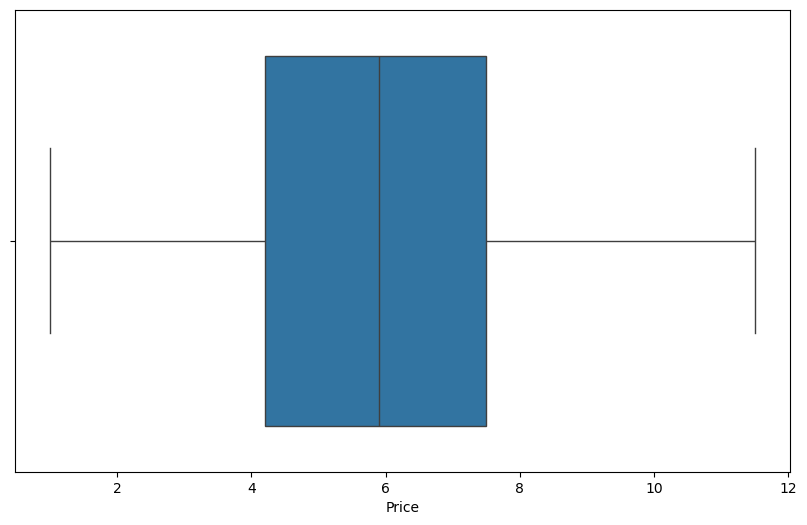

In [274]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x= "Price")
plt.ticklabel_format(style="plain", axis='x')
plt.show()

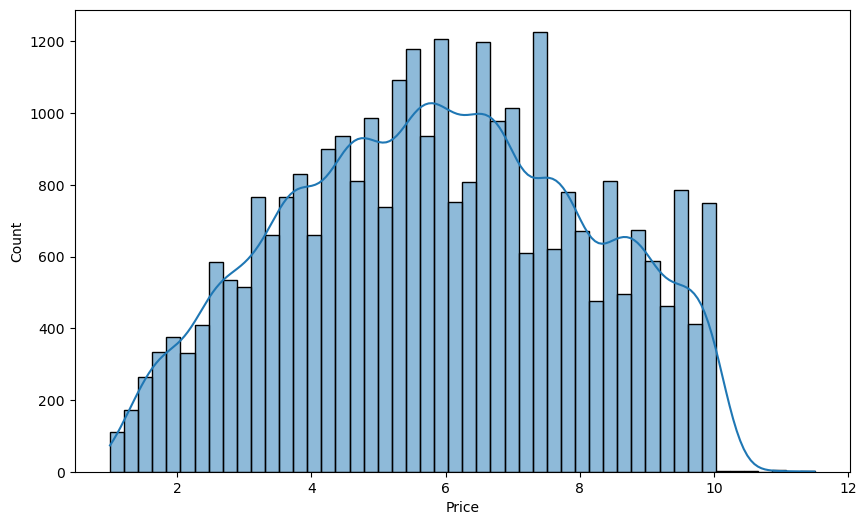

In [275]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Price", kde=True)
plt.show()

There is no outlier in the price columns, so I do not need to remove any data.

### Relationship

I observe the relationship between Price and dependent variables through ScatterPlot.

Text(0.5, 1.0, 'Area vs Price')

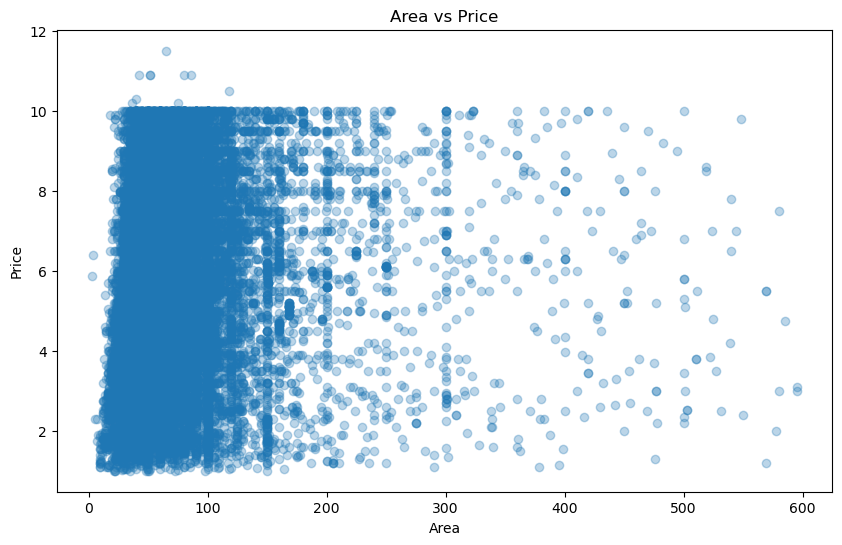

In [276]:
plt.figure(figsize=(10,6))
sns.regplot(data = df, x="Area", y = "Price", fit_reg= False, scatter_kws={'alpha':0.3})
plt.title('Area vs Price')

Text(0.5, 1.0, 'Frontage vs Price')

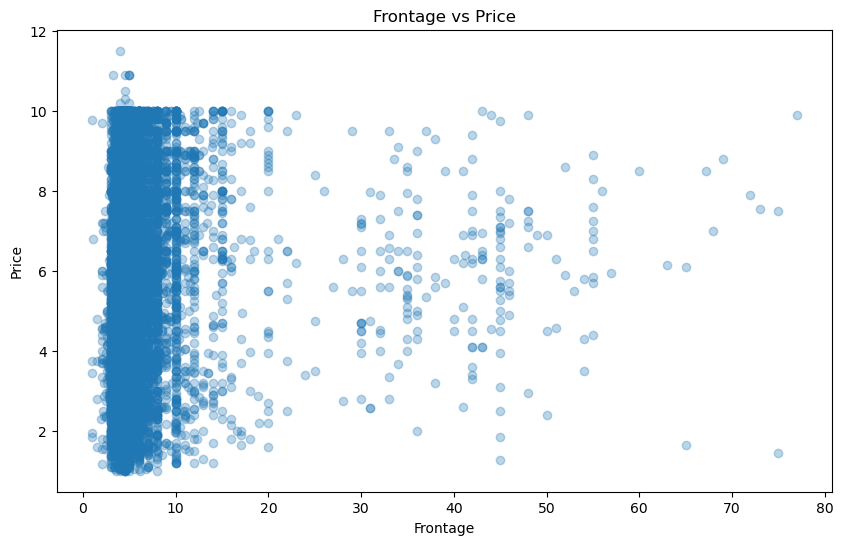

In [277]:
plt.figure(figsize=(10,6))
sns.regplot(data = df, x="Frontage", y = "Price", fit_reg= False, scatter_kws={'alpha':0.3})
plt.title('Frontage vs Price')

Text(0.5, 1.0, 'Access roads vs Price')

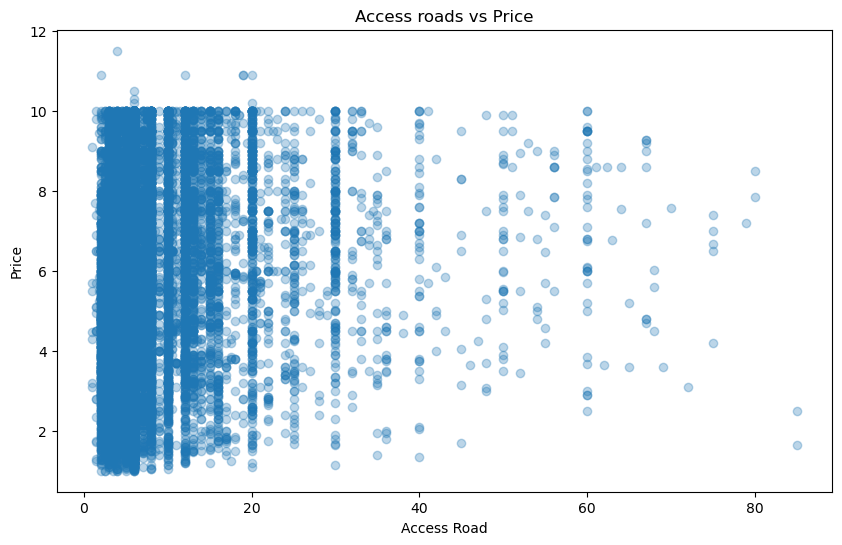

In [278]:
plt.figure(figsize=(10,6))
sns.regplot(data = df, x="Access Road", y = "Price", fit_reg= False, scatter_kws={'alpha':0.3})
plt.title('Access roads vs Price')

When comparing Floors with Price, there is a few outlier in property which has 7 floors, and there are some house has 9 and 10 floors. We can see that 50% of property's price affected by number of floors, the more floors means the higher price.

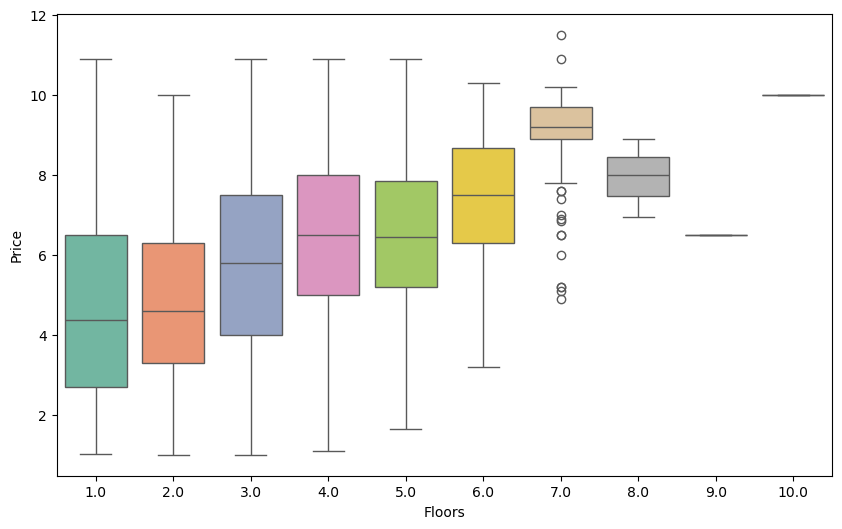

In [279]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Floors', y ="Price", data=df,  palette="Set2")
sns.color_palette()
plt.show()

Both house and balcony direction do not affect the price.

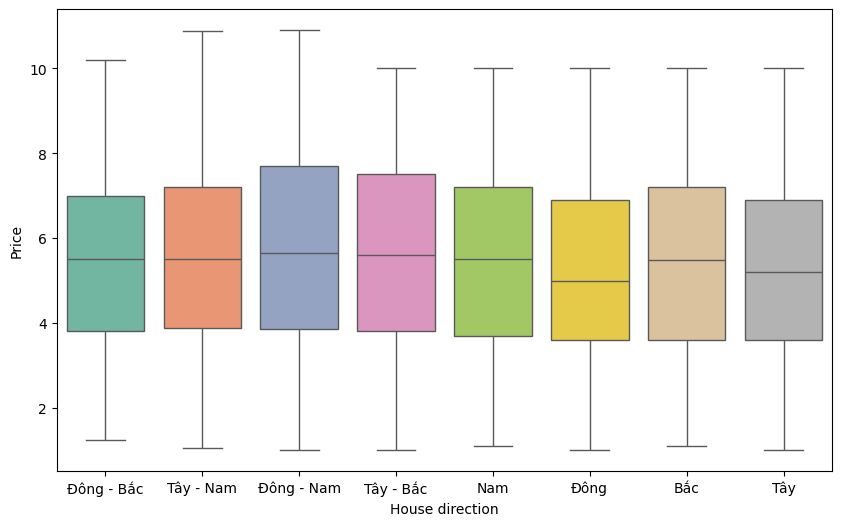

In [280]:
plt.figure(figsize=(10,6))
sns.boxplot(x='House direction', y ="Price", data=df, palette="Set2")
plt.show()

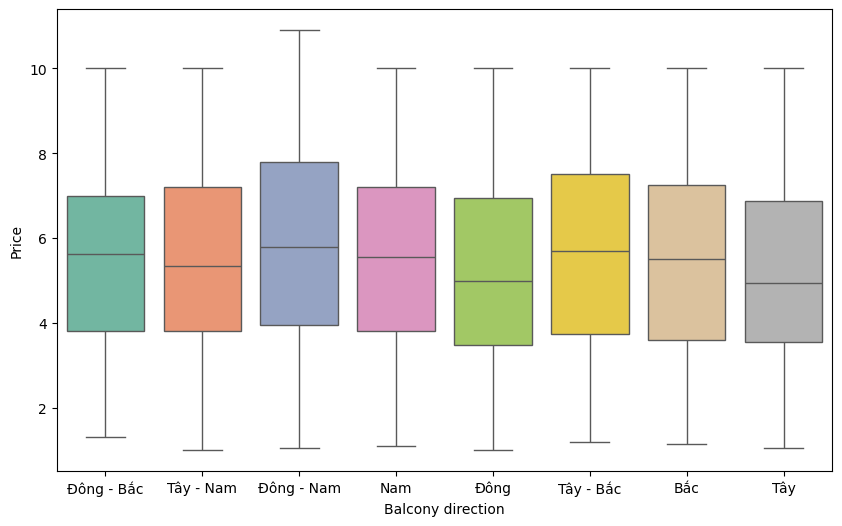

In [281]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Balcony direction', y ="Price", data=df, palette="Set2")
plt.show()

Number of bedrooms and bathrooms, some outlier and **little impact** on the Price.

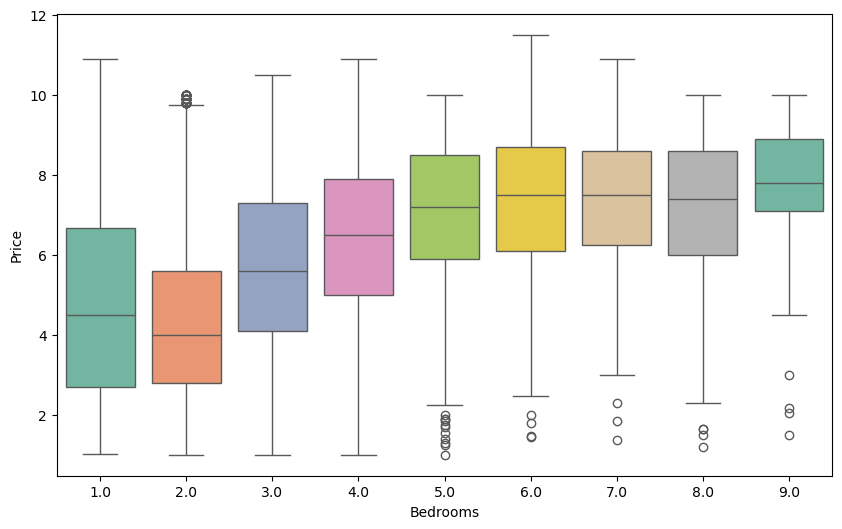

In [282]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Bedrooms', y ="Price", data=df, palette="Set2")
plt.show()

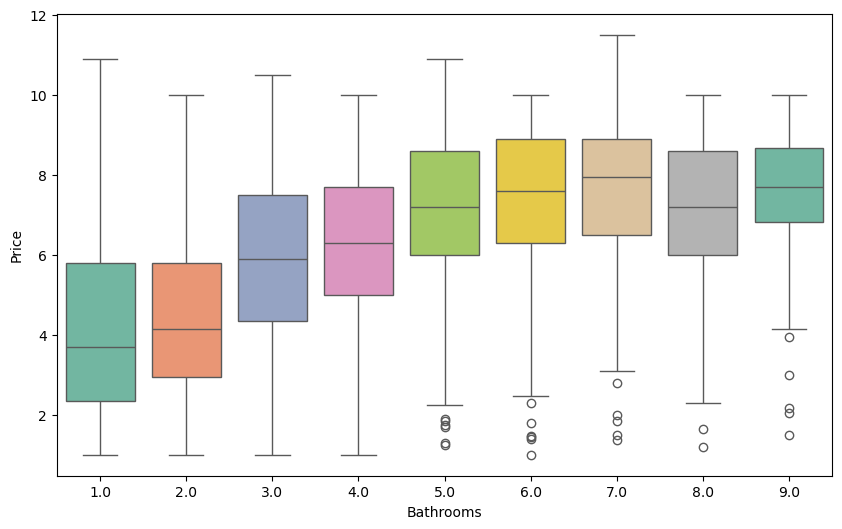

In [283]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Bathrooms', y ="Price", data=df,palette="Set2")
plt.show()

### Correlation of numeric columns

<Axes: >

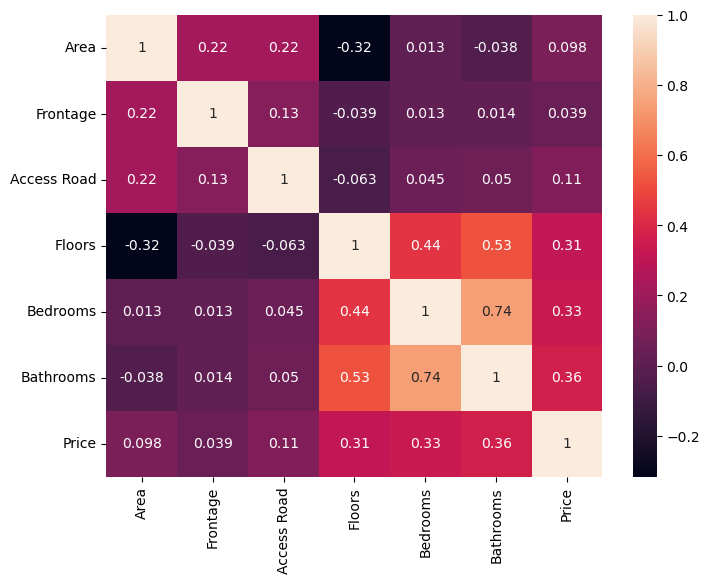

In [284]:
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True)

The correlation is under 0.5 for other columns with Price, it means that using Linear Regression will not be a good idea.

### Dealing with Null Value for Categorical Data

For the categorical data such as Legal status, Furniture state, I replace null value with None, it is more suitable instead of replace with most frequent value.

In [285]:
df['Legal status'] = df['Legal status'].fillna('None')
df['Furniture state'] = df['Furniture state'].fillna('None')

In [286]:
df.drop('House direction', inplace = True, axis = 1)
df.drop('Balcony direction', inplace = True, axis = 1)

I split the Address column into Province and whether it is project or not.

In [287]:
df['Province'] = df['Address'].str.split(", ").str[-1].str.replace(".", "")
df['Project'] = df['Address'].str.lower().str.contains('dự án').map({True: 1, False: 0})

In [288]:
df["Province"].unique()

array(['Hưng Yên', 'Hồ Chí Minh', 'Hà Nội', 'Quảng Ninh', 'Bình Dương',
       'Phú Thọ', 'Hải Dương', 'Long An', 'Kiên Giang', 'Bình Thuận',
       'Hải Phòng', 'Hà Nam', 'Bà Rịa Vũng Tàu', 'Hồ Chí Minh giá 2tỷ380',
       'Đắk Lắk', 'Bắc Ninh', 'Thanh Hóa', 'Khánh Hòa', 'Đà Nẵng',
       'Thái Nguyên', 'Quảng Trị', 'Đồng Nai', 'Tuyên Quang',
       'Ninh Thuận', 'Nghệ An', 'Cần Thơ', 'Thái Bình', 'Bắc Giang',
       'Lâm Đồng', 'Trà Vinh', 'Bình Phước', 'Quảng Nam', 'Hòa Bình',
       'Thừa Thiên Huế', 'Sơn La', 'Bình Định', 'Vĩnh Phúc', 'Tây Ninh',
       'Tiền Giang', 'Hà Tĩnh', 'Lạng Sơn', 'Hà Nội', 'Lào Cai',
       'Điện Biên', 'Gia Lai', 'Đường số 11', 'Phú Yên', 'Bến Tre',
       'Quận Bình Thạnh', 'An Giang', 'TPHCM', 'TpHCM',
       'Phòng công chứng Nguyễn Thị Thành', 'Quảng Ngãi', 'Hà Giang',
       'HN', 'Nam Định', 'Sóc Trăng', 'Ninh Bình', 'Yên Bái', 'Cà Mau',
       'Bạc Liêu',
       'Bán nhà chính chủ Phó Đức Chính khu Bà Chiểu - trung tâm Bình Thạnh giá cực tốt',


In [289]:
df["Province"].replace({"TPHCM":"Hồ Chí Minh", "TpHCM":"Hồ Chí Minh", "HN": "Hà Nội", "TP Hồ Chí Minh":"Hồ Chí Minh"}, inplace=True)

In [290]:
# I want to drop rows that belong to provinces with fewer than 5 occurrences
unique_provinces = df['Province'].value_counts()
unique_provinces = unique_provinces[unique_provinces < 5].index
df = df[~df['Province'].isin(unique_provinces)]

# Dropping Address since we don't need it anymore
df.drop('Address', axis = 1, inplace = True)

## Exploring Data Analysis

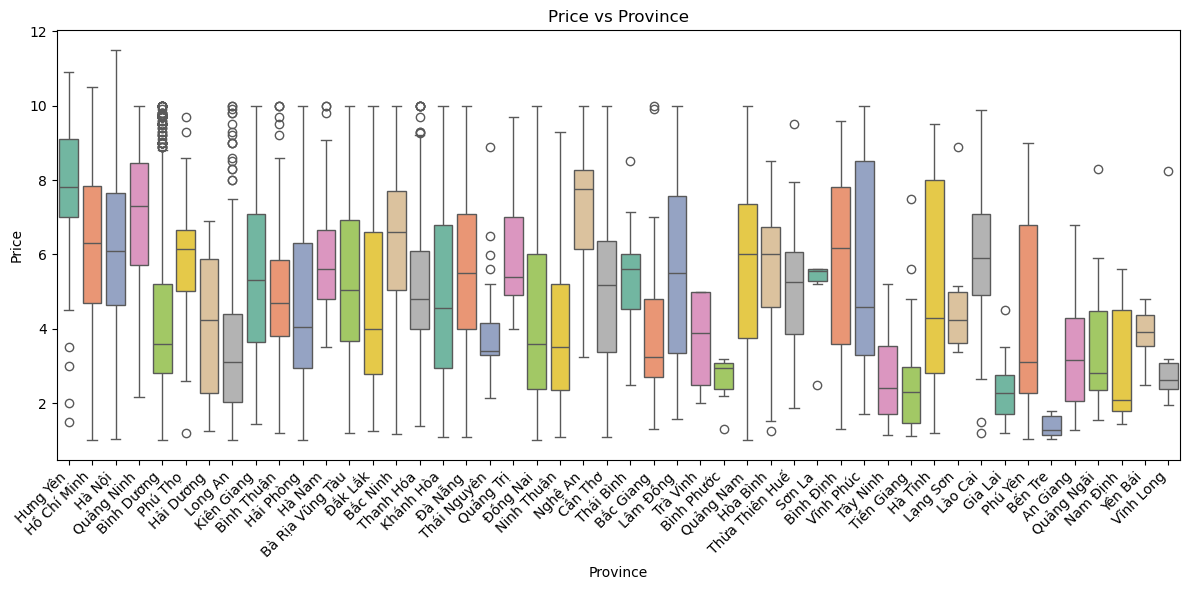

In [291]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Province', y='Price', data=df, palette="Set2")
plt.title('Price vs Province')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

House with Certificate has higher price than only Sale contract.

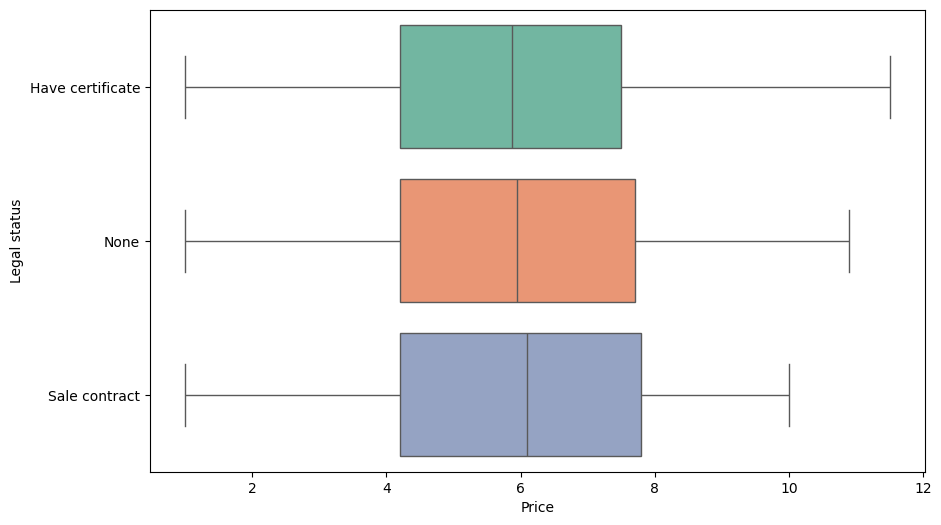

In [294]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, y = "Legal status", x="Price", orient='h', palette="Set2")
plt.show()

Cannot conclude something.

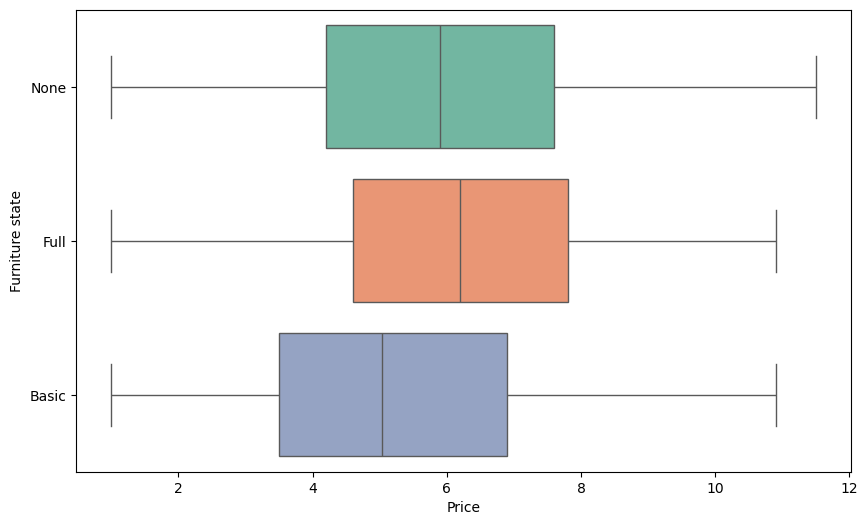

In [295]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, y = "Furniture state", x="Price", orient='h', palette="Set2")
plt.show()

## Model Prediction

### Split Training and Test set

In [297]:
X = df.drop(["Price","Legal status", "Furniture state", "Province", "Project"], axis= 1)
Y = df["Price"]
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.7, test_size= 0.3, random_state=42)

In [304]:
lm = LinearRegression()
lgbm = lightgbm.LGBMRegressor(random_state = 42)
mlp = MLPRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)
xgbt = xgb.XGBRegressor(random_state = 42)
dtree = DecisionTreeRegressor(random_state = 42)

### Model Comparision with Numeric data

In [299]:
reg = [lm, lgbm, mlp, ridge, lasso, knn, rf, xgbt, dtree]
result = []
for i in reg:
    model = i.fit(x_train,y_train)
    result.append([str(i).split("(")[0], 
                   model.score(x_train, y_train), 
                   model.score(x_test, y_test),
                   np.sqrt(mean_squared_error(y_train, model.predict(x_train))),
                  np.sqrt(mean_squared_error(y_test, model.predict(x_test))),
                  mean_absolute_error(y_train, model.predict(x_train)),
                  mean_absolute_error(y_test, model.predict(x_test))])
result_raw_model = pd.DataFrame(result, columns = ["Model", "Train_Score", "Test_Score", "Train_Rmse", "Test_Rmse", "Train_Mae", "Test_Mae"]).sort_values("Test_Rmse").set_index("Model")
result_raw_model


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 536
[LightGBM] [Info] Number of data points in the train set: 21133, number of used features: 6
[LightGBM] [Info] Start training from score 5.876419


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae
Model,,,,,,
LGBMRegressor,0.405504,0.340307,1.701814,1.802767,1.363322,1.438968
XGBRegressor,0.497189,0.322613,1.565093,1.826783,1.229920,1.446648
MLPRegressor,0.278949,0.273878,1.874220,1.891357,1.516278,1.522279
RandomForestRegressor,0.776910,0.253330,1.042504,1.917931,0.744352,1.484328
KNeighborsRegressor,0.452347,0.208018,1.633391,1.975269,1.280272,1.546431
Ridge,0.192031,0.190333,1.983969,1.997202,1.622265,1.628424
LinearRegression,0.192031,0.190333,1.983969,1.997202,1.622265,1.628423
Lasso,0.012256,0.012165,2.193612,2.206027,1.825418,1.833545
DecisionTreeRegressor,0.844707,-0.124852,0.869790,2.354054,0.383869,1.762381


### Split train and test set

In [300]:
one_hot_vars = ["Legal status", "Furniture state", "Province"]
df = pd.get_dummies(df,prefix = one_hot_vars, prefix_sep = "_" , drop_first = True)


In [301]:
X = df.drop(["Price"], axis= 1)
Y = df["Price"]
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.7, test_size= 0.3, random_state=42)

### Model Estimation with Categorical data

In [303]:
reg = [lm, lgbm, mlp, ridge, lasso, knn, rf, xgbt, dtree]
result = []
for i in reg:
    model = i.fit(x_train,y_train)
    result.append([str(i).split("(")[0], 
                   model.score(x_train, y_train), 
                   model.score(x_test, y_test),
                   np.sqrt(mean_squared_error(y_train, model.predict(x_train))),
                  np.sqrt(mean_squared_error(y_test, model.predict(x_test))),
                  mean_absolute_error(y_train, model.predict(x_train)),
                  mean_absolute_error(y_test, model.predict(x_test))])
result_raw_model = pd.DataFrame(result, columns = ["Model", "Train_Score", "Test_Score", "Train_Rmse", "Test_Rmse", "Train_Mae", "Test_Mae"]).sort_values("Test_Rmse").set_index("Model")
result_raw_model


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 21133, number of used features: 37
[LightGBM] [Info] Start training from score 5.876419


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae
Model,,,,,,
LGBMRegressor,0.554895,0.491059,1.472547,1.583443,1.157092,1.239726
XGBRegressor,0.615355,0.489356,1.368888,1.586089,1.059692,1.231794
MLPRegressor,0.492505,0.459416,1.572365,1.631925,1.233851,1.278647
RandomForestRegressor,0.890203,0.457415,0.731363,1.634942,0.526983,1.240351
Ridge,0.334421,0.322272,1.800683,1.827244,1.441288,1.456696
LinearRegression,0.334501,0.322093,1.800575,1.827484,1.441190,1.456913
KNeighborsRegressor,0.549485,0.316102,1.481468,1.835542,1.150994,1.422106
DecisionTreeRegressor,0.952800,0.093930,0.479521,2.112757,0.146415,1.547907
Lasso,0.012256,0.012165,2.193612,2.206027,1.825418,1.833545


## Thank you for reading